In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('spotify_artist_data_top200_ph.csv')

In [3]:
dataset.shape

(675, 5)

In [4]:
dataset.describe()

,total_followers,popularity
count,6.750000e+02,675.000000
mean,3.094339e+06,67.367407
std,6.216192e+06,16.538458
min,3.000000e+00,0.000000
25%,1.204015e+05,58.000000
50%,6.571140e+05,70.000000
75%,3.083203e+06,80.000000
max,6.206792e+07,100.000000


In [5]:
dataset

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,24698975,"dance pop, pop, post-teen pop",88
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,5758712,"pop, post-teen pop, talent show, uk pop",84
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,15863067,"edm, electropop, pop, tropical house",87
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,23598693,"pop, pop rock",89
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,5538332,"dance pop, pop, post-teen pop",79
...,...,...,...,...,...
670,3FwNjtXQCdxpDOXmgJQGnG,Emman,5919,Unidentified,54
671,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2281188,"pop, pop rap, rap, toronto rap, trap, urban co...",84
672,1lmU3giNF3CSbkVSQmLpHQ,Surf Mesa,10666,Unidentified,70
673,3O5HD95HTEPgoPFOjAb7yV,DripReport,29197,meme rap,74


In [6]:
dataset2 = pd.concat([dataset[['artist_id','artist_name','total_followers','popularity']], dataset['genres'].str.get_dummies(sep=', ').add_prefix('genre_')],axis=1)

In [7]:
dataset2

,artist_id,artist_name,total_followers,popularity,genre_Unidentified,genre_a cappella,genre_acoustic opm,genre_acoustic pop,genre_adult standards,genre_afrofuturism,...,genre_vapor twitch,genre_viral pop,genre_virgin islands reggae,genre_vispop,genre_vocal house,genre_vocal jazz,genre_west coast rap,genre_world worship,genre_worship,genre_yacht rock
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,24698975,88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,5758712,84,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,15863067,87,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,23598693,89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,5538332,79,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,3FwNjtXQCdxpDOXmgJQGnG,Emman,5919,54,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2281188,84,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,1lmU3giNF3CSbkVSQmLpHQ,Surf Mesa,10666,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,3O5HD95HTEPgoPFOjAb7yV,DripReport,29197,74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dataset2.isnull().any()

artist_id               False
artist_name             False
total_followers         False
popularity              False
genre_Unidentified      False
                        ...  
genre_vocal jazz        False
genre_west coast rap    False
genre_world worship     False
genre_worship           False
genre_yacht rock        False
Length: 311, dtype: bool

In [9]:
y = dataset2['popularity'].values

In [10]:
X = dataset2.iloc[:, 5:310]

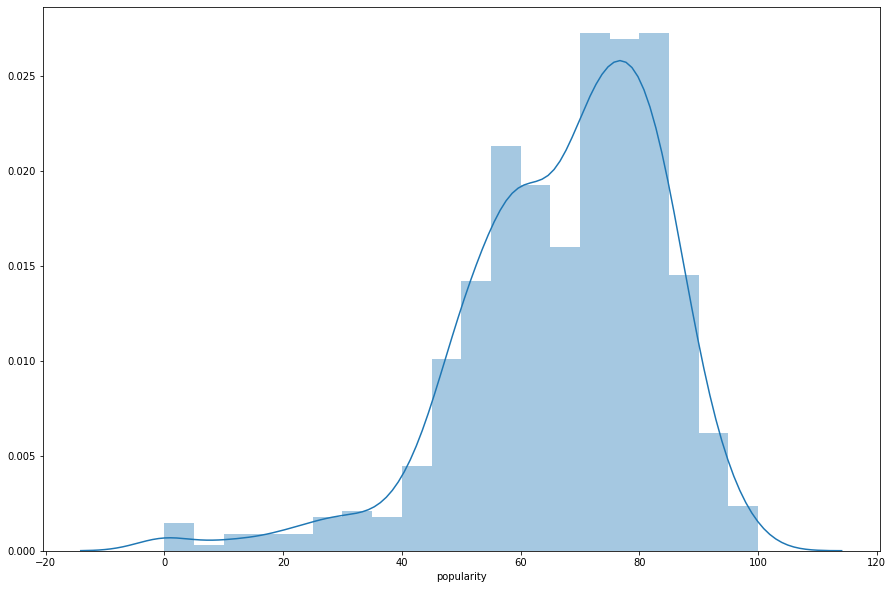

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['popularity'])

In [12]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y)

In [13]:
dataset3 = dataset2.iloc[:, 5:457]
dataset3.shape

(675, 306)

In [14]:
dataset3

,genre_a cappella,genre_acoustic opm,genre_acoustic pop,genre_adult standards,genre_afrofuturism,genre_album rock,genre_alternative metal,genre_alternative pop rock,genre_alternative r&b,genre_alternative rock,...,genre_vapor twitch,genre_viral pop,genre_virgin islands reggae,genre_vispop,genre_vocal house,genre_vocal jazz,genre_west coast rap,genre_world worship,genre_worship,genre_yacht rock
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


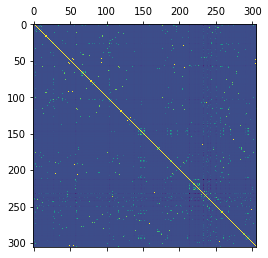

<Figure size 14400x10800 with 0 Axes>

In [15]:
plt.matshow(dataset3.corr())
plt.figure(figsize=(200,150))
plt.tight_layout()

In [16]:
print("Correlation Matrix")
print(dataset3.corr())
print()

Correlation Matrix
                       genre_a cappella  genre_acoustic opm  \
genre_a cappella               1.000000           -0.003327   
genre_acoustic opm            -0.003327            1.000000   
genre_acoustic pop            -0.003943           -0.008843   
genre_adult standards         -0.007235           -0.016225   
genre_afrofuturism            -0.001484           -0.003327   
...                                 ...                 ...   
genre_vocal jazz              -0.003648           -0.008181   
genre_west coast rap          -0.001484           -0.003327   
genre_world worship           -0.001484           -0.003327   
genre_worship                 -0.001484           -0.003327   
genre_yacht rock              -0.001484           -0.003327   

                       genre_acoustic pop  genre_adult standards  \
genre_a cappella                -0.003943              -0.007235   
genre_acoustic opm              -0.008843              -0.016225   
genre_acoustic pop  

In [17]:
def get_redundant_pairs(dataset3):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = dataset3.columns
    for i in range(0, dataset3.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [18]:
def get_top_abs_correlations(dataset3, n=5):
    au_corr = dataset3.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(dataset3)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [29]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dataset3, 50))

Top Absolute Correlations
genre_deep euro house             genre_deep house                    1.000000
genre_funk carioca                genre_funk das antigas              1.000000
genre_childrens music             genre_dong-yo                       1.000000
genre_cartoon                     genre_childrens music               1.000000
genre_kaneka                      genre_polynesian pop                1.000000
genre_belgian dance               genre_belgian edm                   1.000000
genre_funk das antigas            genre_pagode baiano                 1.000000
genre_britpop                     genre_madchester                    1.000000
genre_christian alternative rock  genre_world worship                 1.000000
                                  genre_worship                       1.000000
genre_ccm                         genre_world worship                 1.000000
                                  genre_worship                       1.000000
genre_classify            

In [20]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [21]:
dataset3_asint = dataset3.astype(int)
coocc = dataset3_asint.T.dot(dataset3_asint)
coocc

,genre_a cappella,genre_acoustic opm,genre_acoustic pop,genre_adult standards,genre_afrofuturism,genre_album rock,genre_alternative metal,genre_alternative pop rock,genre_alternative r&b,genre_alternative rock,...,genre_vapor twitch,genre_viral pop,genre_virgin islands reggae,genre_vispop,genre_vocal house,genre_vocal jazz,genre_west coast rap,genre_world worship,genre_worship,genre_yacht rock
genre_a cappella,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
genre_acoustic opm,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
genre_acoustic pop,0,0,7,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
genre_adult standards,0,0,0,23,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
genre_afrofuturism,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
genre_vocal jazz,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
genre_west coast rap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
genre_world worship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
genre_worship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
